> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

I chose the TMDB movie data for analysis. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The movies features include title, budget,cast,director, keywords, runtime, genres, production companies, release date, revenue and so on. 
According the information we can get from the data set. I can research on some questions.
1 Which genres are most popular from year to year?
2 What kinds of properties are associated with movies that have high revenues?
3 which directors or cast have more aduience? 
4 does high rating mean high popularity?
5 which features are associated with movies that have high audience?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

According to the questions i want to work on. I need to read data and clean the features i need work on. 
Firstly, i saved the raw data into df. from the original data set to do the basic research.
Then i cleaned the release_date, genre columns saved them into new data set named movie. and cleaned cast column saved in cast data set, cleaned director feature saved in director data set.
At last, i used line plot based on the movie data group by genre, get the trendency of different kinds of movie with the time going. And used the correlation plot with the scatter plot get the features which have some correlations with revenue. In addition, i got the director and cast who has the most mean popularity and revenues through the pandas function.


First step: Read the csv file, and save the data into a dataframe named df.


In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Do some research on the data. We can know the column data types from dataframe.info()
Get the unique values for all columns in the data with dataframe.nunique().

In [3]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

To research the anything based on the release_year, it is better to change the type to int or date instead of the string. and change release_Date into date_time.
And for cells contain multiple values separated by pipe (|) characters, we should seperate them into different cells.

And for the missing values for different features. I decide to decide according to different questions we want to research. if we delete all missing value at the beginning, we will lose a lot of information, such as for the homepage, we have a lot of missing values for this feature, but if we delete all rows with missing value of this feature, we almost lose 80% amount of information to research on this question: which director is most popluar? and so on.

### Clean the genres data and date data

From the previous research on the data file, we can see there are multiple values shows in one cell in genre column. Since i want to know Which genres are most popular from year to year? except i need clean the genre column,i also need to change the date column from string to date or integer.


Step1: I used the split function to seperate the string stored in the genre column, and stored these different values into different rows.(duplicated the infomation in other columns, but stored the unique value into the genre feature). And i choose to delete the rows with NaN value in the genre columns.

In addition, i extracted the unique values of the genre features and stored them into one list, named genre_list.

In [4]:
df2 = df.genres.str.split('|').apply(pd.Series).stack()
df2.index = df2.index.droplevel(-1)
moviedf = pd.DataFrame(df2)
moviedf.columns=['genre']
del df['genres']
movie=df.join(moviedf)
movie.dropna(subset=['genre'], inplace=True)
genre_list=np.array(movie['genre'].unique()).tolist()

Step2: I changed the release_date from string to date_time.

In [5]:
movie['release_date']=pd.to_datetime(movie['release_date'])

Step3: I changed the release_year from string to integer.

In [6]:
movie['release_year'].astype(int)

0        2015
0        2015
0        2015
0        2015
1        2015
1        2015
1        2015
1        2015
2        2015
2        2015
2        2015
3        2015
3        2015
3        2015
3        2015
4        2015
4        2015
4        2015
5        2015
5        2015
5        2015
5        2015
6        2015
6        2015
6        2015
6        2015
7        2015
7        2015
7        2015
8        2015
         ... 
10853    1966
10853    1966
10854    1966
10854    1966
10854    1966
10855    1966
10855    1966
10855    1966
10855    1966
10856    1966
10856    1966
10856    1966
10857    1966
10857    1966
10858    1966
10858    1966
10859    1966
10859    1966
10859    1966
10859    1966
10860    1966
10861    1966
10862    1966
10862    1966
10862    1966
10863    1966
10863    1966
10864    1966
10864    1966
10865    1966
Name: release_year, Length: 26960, dtype: int64

Then before i do any analysis, i check if i succeed cleaned the data i will use in the future.

In [7]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26960 entries, 0 to 10865
Data columns (total 21 columns):
id                      26960 non-null int64
imdb_id                 26937 non-null object
popularity              26960 non-null float64
budget                  26960 non-null int64
revenue                 26960 non-null int64
original_title          26960 non-null object
cast                    26836 non-null object
homepage                7150 non-null object
director                26869 non-null object
tagline                 20584 non-null object
keywords                23639 non-null object
overview                26955 non-null object
runtime                 26960 non-null int64
production_companies    24762 non-null object
release_date            26960 non-null datetime64[ns]
vote_count              26960 non-null int64
vote_average            26960 non-null float64
release_year            26960 non-null int64
budget_adj              26960 non-null float64
revenue_adj  

### Clean director data and cast data

Same as the genre column, for director and cast feature, we also have multiple values in one cell.
Used the same method to seperate them into different rows.

In [8]:
df3 = df.director.str.split('|').apply(pd.Series).stack()
df3.index = df3.index.droplevel(-1)
directordf = pd.DataFrame(df3)
directordf.columns=['directors']
del df['director']
director=df.join(directordf)
director.dropna(subset=['directors'], inplace=True)

In [9]:
df4 = df.cast.str.split('|').apply(pd.Series).stack()
df4.index = df4.index.droplevel(-1)
castdf = pd.DataFrame(df4)
castdf.columns=['casts']
del df['cast']
cast=df.join(castdf)
cast.dropna(subset=['casts'], inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

Step1: I want to know the whole trendency for all the amount of the movies according to time.
       so i chose to use the histogram to visulize the trend.

Text(0,0.5,'Amount')

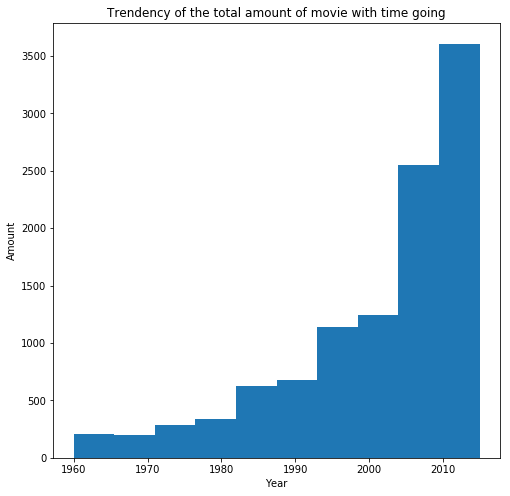

In [14]:
movie_with_time_going=df['release_year'].plot(kind='hist',figsize=(8,8),title="Trendency of the total amount of movie with time going")
movie_with_time_going.set_xlabel("Year")
movie_with_time_going.set_ylabel("Amount")

From the picture above, In general, we can see the total amount of movies are increasing with the time going.

Step2: after knowing the whole trendency, then i need to see the trend of different kind of genre.
       i used for loop and the groupby funtion with the line plot to see the subtotal amount of the movie of different        genres.

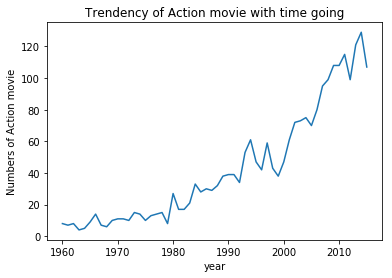

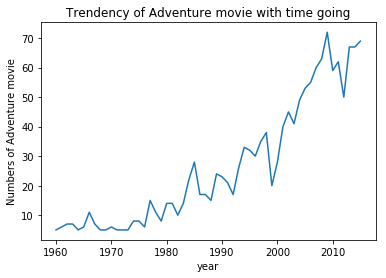

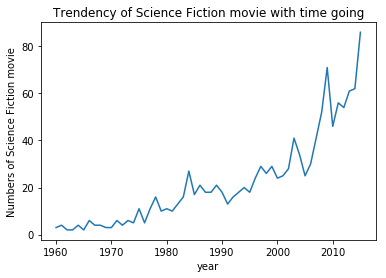

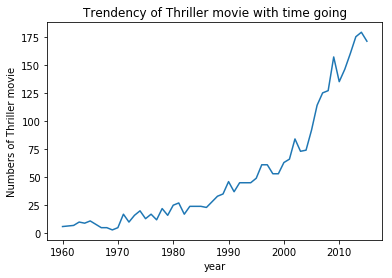

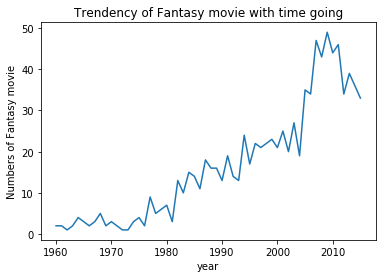

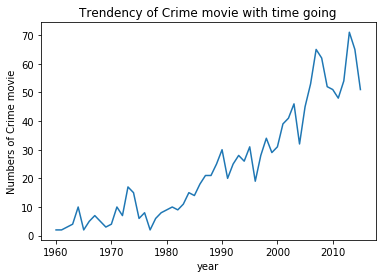

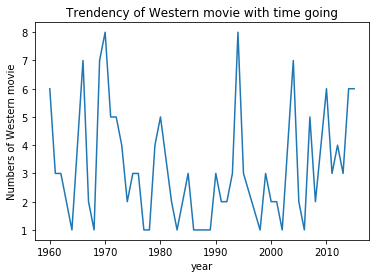

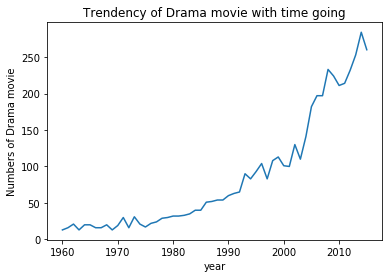

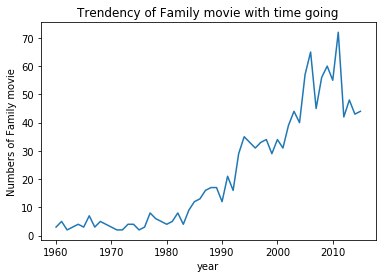

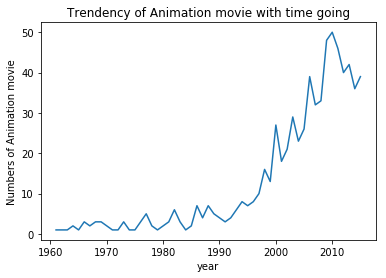

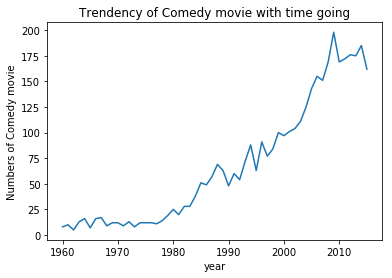

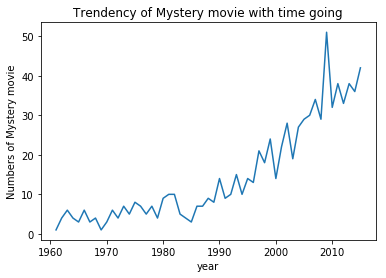

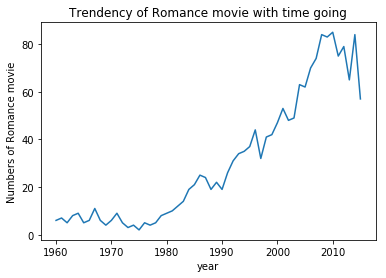

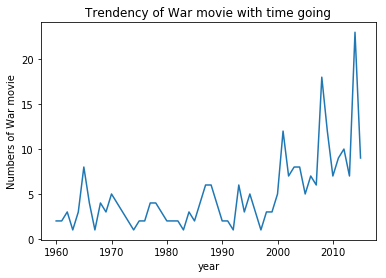

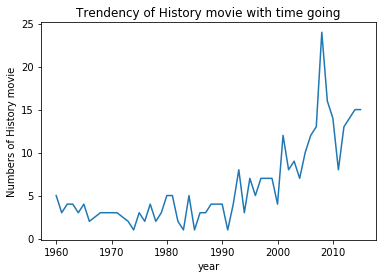

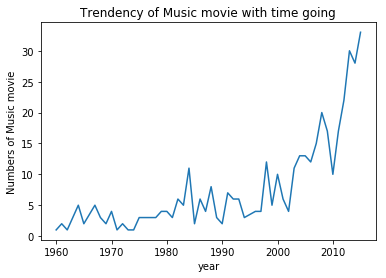

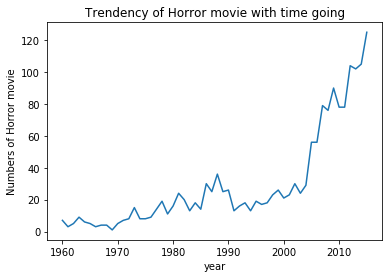

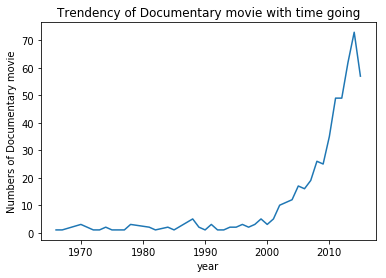

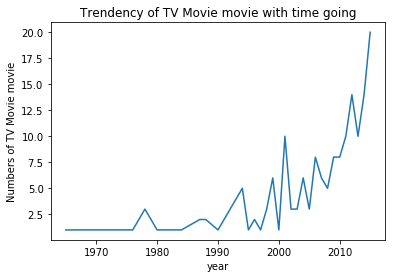

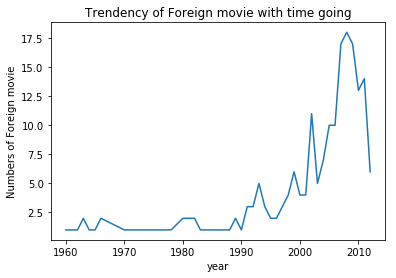

In [15]:
for item in genre_list:
    plt.figure()
    plt.plot(movie[movie['genre']==item].groupby('release_year').count()['id'])
    plt.xlabel('year')
    plt.ylabel('Numbers of {} movie'.format(item))
    plt.title('Trendency of {} movie with time going'.format(item))

We can see from these pictures, almost the amount of movies in all kinds of genres are increseing with time going. except for the western movie.

We also can get the Drama, Comedy, Horror are more than other kinds of movies.
Especially the Horror movies grow very fast after year 2000.



But in view of the total amount is also growing, so i think we need use the percentage of total amount movies in different year to do the deep research.

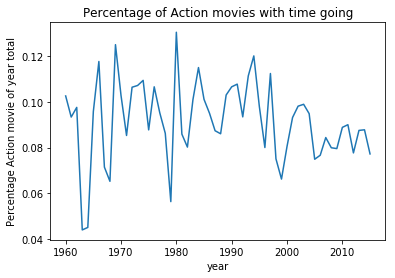

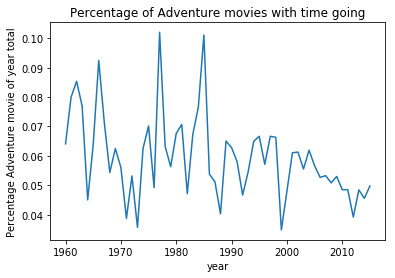

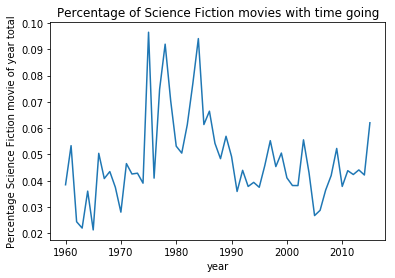

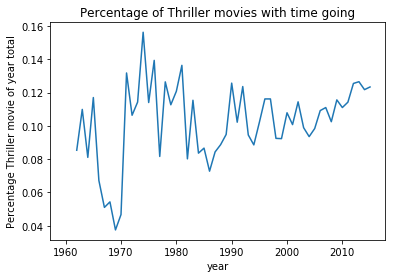

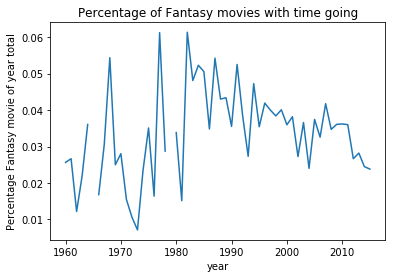

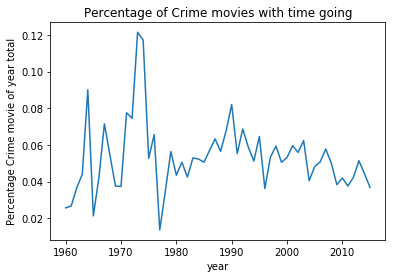

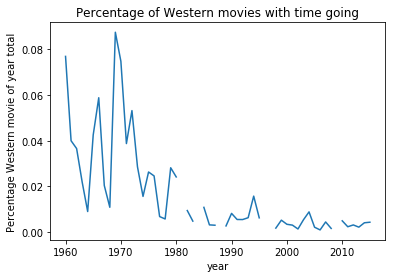

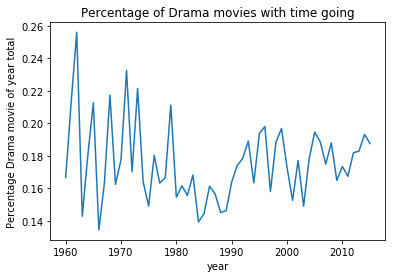

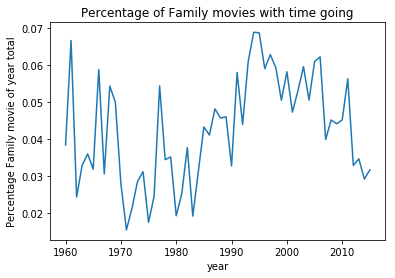

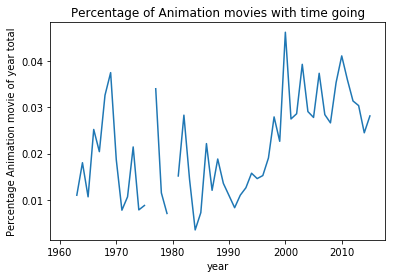

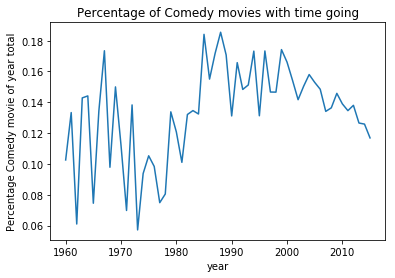

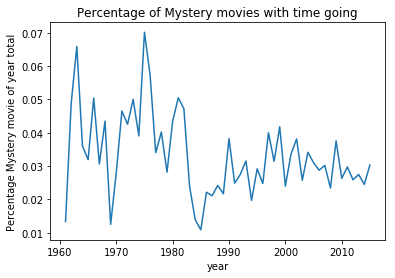

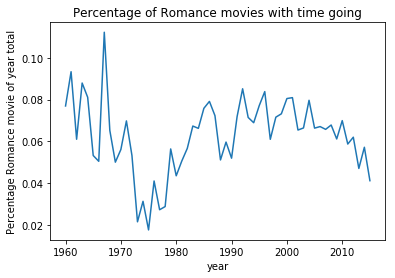

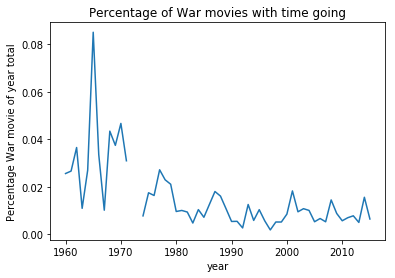

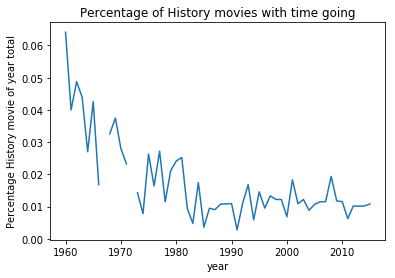

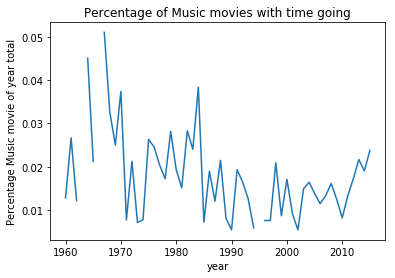

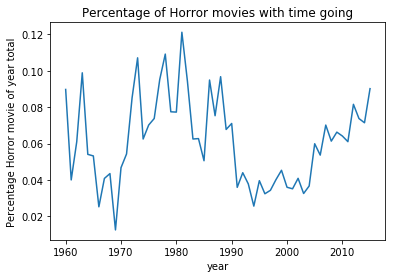

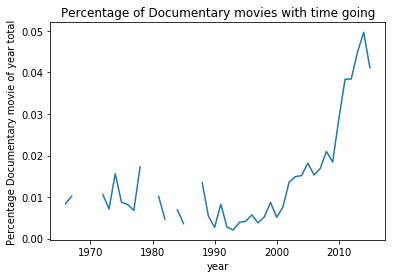

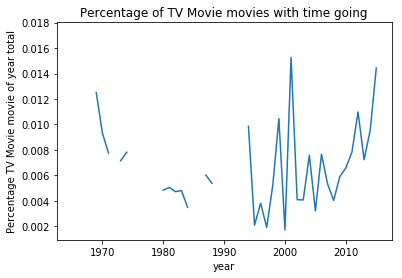

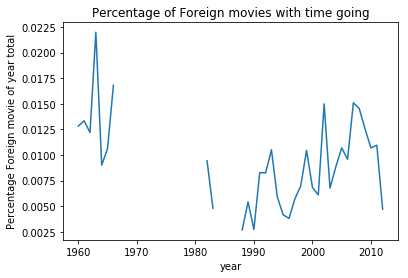

In [16]:
for item in genre_list:
    plt.figure()
    plt.plot(movie[movie['genre']==item].groupby('release_year').count()['id']/movie.groupby('release_year').count()['id'])
    plt.xlabel('year')
    plt.ylabel('Percentage {} movie of year total'.format(item))
    plt.title('Percentage of {} movies with time going'.format(item))

Roughly, we can see all kinds movie almost don't have the obviously trend according to year. but we can also see the history movie's market occupancy decresed from 0.06 to 0.01, so did western movie, from 0.08 to 0.01.
Inversely, market occupancy of Document movie incresed from 0.01 to 0.05.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

Step1: I tried to get the scatter plot of all the integer columns with revenue, to see which feature may have some correlation with revenue.

In [17]:
movie2=df[['id','popularity','budget','revenue','vote_count','vote_average','release_year','budget_adj','revenue_adj']]
movie2['release_year'].astype(int)
movie2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
id              10866 non-null int64
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(5)
memory usage: 764.1 KB


First, i used the correlation plots to see which feature has significant relationship.

Text(0.5,1,'Correlation heat map Plot for all numeric data')

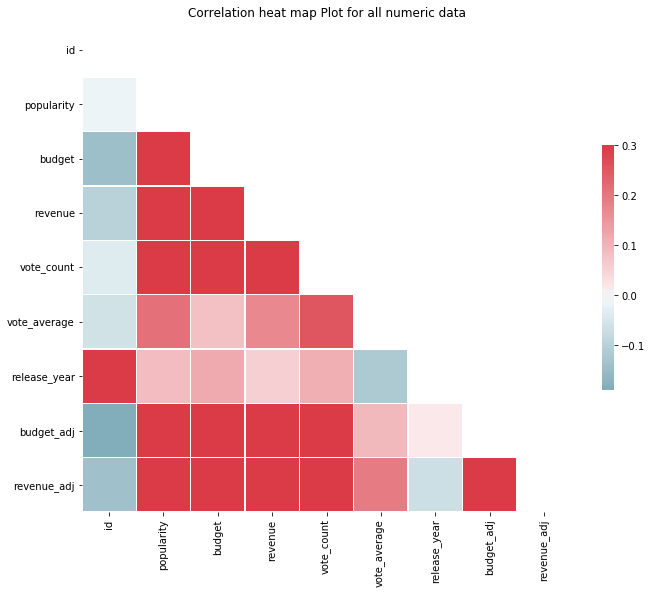

In [23]:
corr = movie2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation heat map Plot for all numeric data')

From the correlation plot. we can see popularity, budget, vote_count have some relationship with revenue than other features. and the correlations are positive. which means more popularity more revenue. more budget more revenue etc.


Then i decide to use the scatter plot to check if i can get the same result.

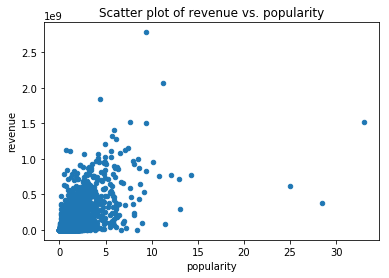

In [21]:
movie2.plot(x='popularity',y='revenue',kind='scatter',title='Scatter plot of revenue vs. popularity')

From the plot above, we can see popularities of almost all the points are less than 10 and revenues are less than 1.
They are concentrated. But we also can say there is a slightly trend exsits. more popularity more revenue.

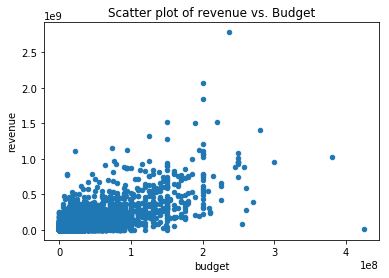

In [22]:
movie2.plot(x='budget',y='revenue',kind='scatter',title='Scatter plot of revenue vs. Budget')

From this picture, we can also see a positive relationship between budget and revenue.

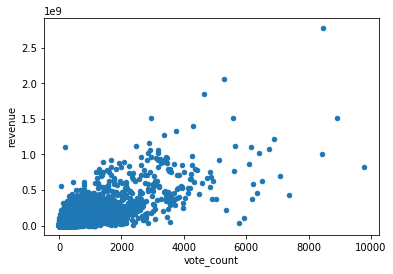

In [20]:
movie2.plot(x='vote_count',y='revenue',kind='scatter')

From this picture, we can also see a positive relationship between vote_count and revenue. But it is not enough, since from the scatter plot we can only see a rough relationship between those two variables. we need do a deep reasearch(test).
And also we can only do a research about the numeric variables from both correlation plot and scatter plot. for the other feature, like director, cast, preduction_company, key words, i cannot use the simple plot to get the relationship with revenue. I may need to do a categorical data analysis.

### Research Question 3 ( which genre has highest mean revenue? which has lowest?)


In case to know the mean revenues for all genres. I used the genre_list(a list stores all the unique values of genres show in the original data) i created before, with for loop, and saved the results in a dictionary.

In [24]:
revenue={}
for item in genre_list:
    revenue[item] = movie[movie['genre']==item].mean()['revenue']

Then i queried the maximum one which has the highest revenue.

In [25]:
maximum = max(revenue, key=revenue.get) 
print(maximum, revenue[maximum])


Adventure 113137861.069


Then i queried the mimimum one which has the lowest revenue.

In [26]:
minimum = min(revenue, key=revenue.get) 
print(minimum, revenue[minimum])

TV Movie 251497.005988


### Research Question 4(which director has most popularity and revenue?)

I believe director has some effects to the popularity and revenue.
So i want to do a simple research to see which director has the highest mean popularity and highest mean revenue.

In [23]:
print ('director has most popularity:')
print(director.groupby('directors').mean()['popularity'].sort_values(ascending=False).head(1))

director has most popularity:
directors
Colin Trevorrow    16.696886
Name: popularity, dtype: float64


In [24]:
print ('director gets most revenue:')
print (director.groupby('directors').mean()['revenue'].sort_values(ascending=False).head(1))

director gets most revenue:
directors
Pierre Coffin    8.903356e+08
Name: revenue, dtype: float64


Even i got the result who has the most mean popularity and revenue. it can not represent anything. i cannot exclude other factors influences. 

### Research Question 4 (which cast has most popularity and revenue?)

I also believe cast has some effects to the popularity and revenue. So i want to do a simple research to see which cast brings the highest mean popularity and highest mean revenue.

In [21]:
print ('Cast has most popularity:')
print(cast.groupby('casts').mean()['popularity'].sort_values(ascending=False).head(1))

Cast has most popularity:
casts
Josh Helman    28.419936
Name: popularity, dtype: float64


In [22]:
print ('cast has most revenue:')
print(cast.groupby('casts').mean()['revenue'].sort_values(ascending=False).head(1))

cast has most revenue:
casts
Daisy Ridley    2.068178e+09
Name: revenue, dtype: float64


Same as before. Even i got the result who has the most mean popularity and revenue. it can not represent anything. i cannot exclude other factors influences. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

Conclusions: 

1.In general, the total amounts of movies have the ascending trendency with the time going. except for the western movie.

2.The drama movie always occupys 20% of market. following by Thriller, Comedy, Action movie.
averagely, the Adventure movie has the highest revenue and popularity

3.From the scatter plot and correlation plot. we can see popularity, budget, vote_count have some relationship with revenue. and the correlations are positive. 

4.In director level, Colin Trevorrow get the highest revenue, Pierre Coffin has the most popularity.
In cast level, Josh Helman get the highest revenue, Daisy Ridley has the most popularity

Limitiations: 

1.And as i mentioned before, just from the simple correlation and scatter plots, i cannot get the accurate conclusion of does high budgets can bring high revenues? More popularity means more revenues?

2.And also i cannot analyze the character variables with the simple scatter plot. I may need to do the categorical data analysis.